# About the notebook

In [2]:
library(flowMap)

Loading required package: ade4
Loading required package: doParallel
Loading required package: foreach
Loading required package: iterators
Loading required package: parallel
Loading required package: abind
Loading required package: reshape2
Loading required package: scales
Loading required package: Matrix


Compare samples to itself

In [7]:
sam1 <- read.table(system.file("extdata/sample.txt",package="flowMap"), header=T)
str(sam1)
table(sam1$id)

'data.frame':	20000 obs. of  5 variables:
 $ CD14: int  186 116 287 148 115 146 18 0 171 173 ...
 $ CD23: int  0 272 370 111 198 178 53 0 290 338 ...
 $ CD3 : int  216 232 349 576 481 553 577 91 263 333 ...
 $ CD19: int  198 175 288 104 217 269 0 42 129 254 ...
 $ id  : int  1 4 8 7 7 7 7 1 4 8 ...



   1    2    3    4    5    6    7    8    9 
1641  809  330 2363 3422  943 7380 2788  324 

In [8]:
sam2 <- read.table(system.file("extdata/sample.txt",package="flowMap"), header=T)
str(sam2)
table(sam2$id)

'data.frame':	20000 obs. of  5 variables:
 $ CD14: int  186 116 287 148 115 146 18 0 171 173 ...
 $ CD23: int  0 272 370 111 198 178 53 0 290 338 ...
 $ CD3 : int  216 232 349 576 481 553 577 91 263 333 ...
 $ CD19: int  198 175 288 104 217 269 0 42 129 254 ...
 $ id  : int  1 4 8 7 7 7 7 1 4 8 ...



   1    2    3    4    5    6    7    8    9 
1641  809  330 2363 3422  943 7380 2788  324 

In [17]:
###
mat1 = sam1[sam1$id==1,]
mat2 = sam2[sam2$id==3,]

### pool
mat = rbind(mat1,mat2)

# sample 100 events from the pooled data
sampleSize = 100
nn1 = round(sampleSize*table(mat$id)[1]/nrow(mat))
nn2 = round(sampleSize*table(mat$id)[2]/nrow(mat))

###
submat = rbind(mat1[sample(nrow(mat1),nn1),],mat2[sample(nrow(mat2),nn2),])
colnames(submat)[5] = "sam"

In [19]:
print(table(mat$id))
cat("=======================\n")
cat("Total", nrow(mat), "\n")
cat("=======================\n")
cat("cells from sam1 (id = 1)", nn1, "\n")
cat("cells from sam2 (id = 3)", nn2, "\n")
cat("=======================\n")
cat("Subtotal", nrow(submat))


   1    3 
1641  330 
Total 1971 
cells from sam1 (id = 1) 83 
cells from sam2 (id = 3) 17 
Subtotal 100

In [44]:
head(submat)

,CD14,CD23,CD3,CD19,sam
19103,229,111,236,0,1
18593,91,152,345,165,1
15930,33,167,56,124,1
16553,81,40,175,171,1
15177,82,100,170,95,1
14512,1,119,111,225,1


```
a flow cytometry sample of cell populations, organized in a matrix or a data.frame
of events (rows) by features (columns) where cell populaiton memberships are
indexed in the last column by a variable named id.
```

In [47]:
tmp = submat %>% dplyr::select(-sam)
makeFRMST(tmp)

ERROR: Error in rep(1, Nevents[1]): invalid 'times' argument


the function require the last column


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Warning message in graph.adjacency(distmat * mstree, mode = "undirected", weighted = TRUE, :
“Same attribute for columns and rows, row names are ignored”Warning message in graph.adjacency(distmat, mode = "undirected", weighted = TRUE, :
“Same attribute for columns and rows, row names are ignored”

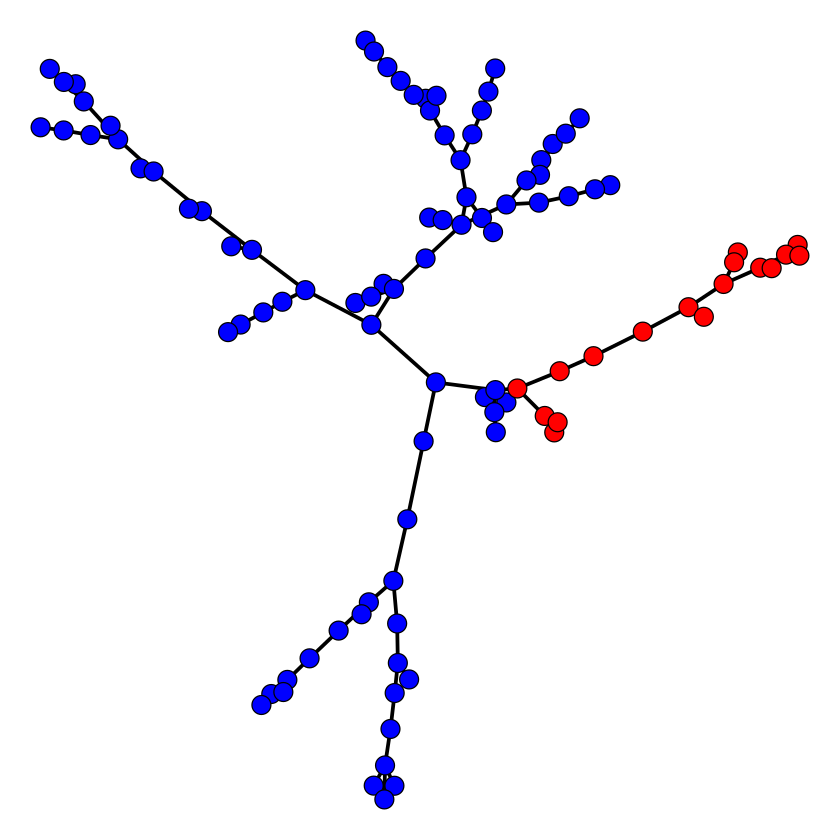

In [20]:
# plot MST of the 100 events
g1 = makeFRMST(submat)
par(mar=c(0,0,0,0))

plot(g1$g, 
     vertex.label.cex=0.01,
     layout=layout.fruchterman.reingold(g1$g))

In [21]:
res1 = getFRest(
    sam1, sam2,
    sampleMethod="proportional",
    sampleSize=100,
    ndraws=100,
    estStat="median",
    ncores=NULL)

computing on 24 cores
computing FR statistics between sample ... 



In [23]:
print(class(res1))
cat("============================")
slotNames(res1)

[1] "FRstats"
attr(,"package")
[1] "flowMap"

[1] "XX1"          "XX2"          "sampleMethod" "sampleSize"   "ncores"      
 [6] "ndraws"       "npop1"        "npop2"        "pop1Labels"   "pop2Labels"  
[11] "ww"           "runs"         "mu"           "sigma2"       "pNorm"


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



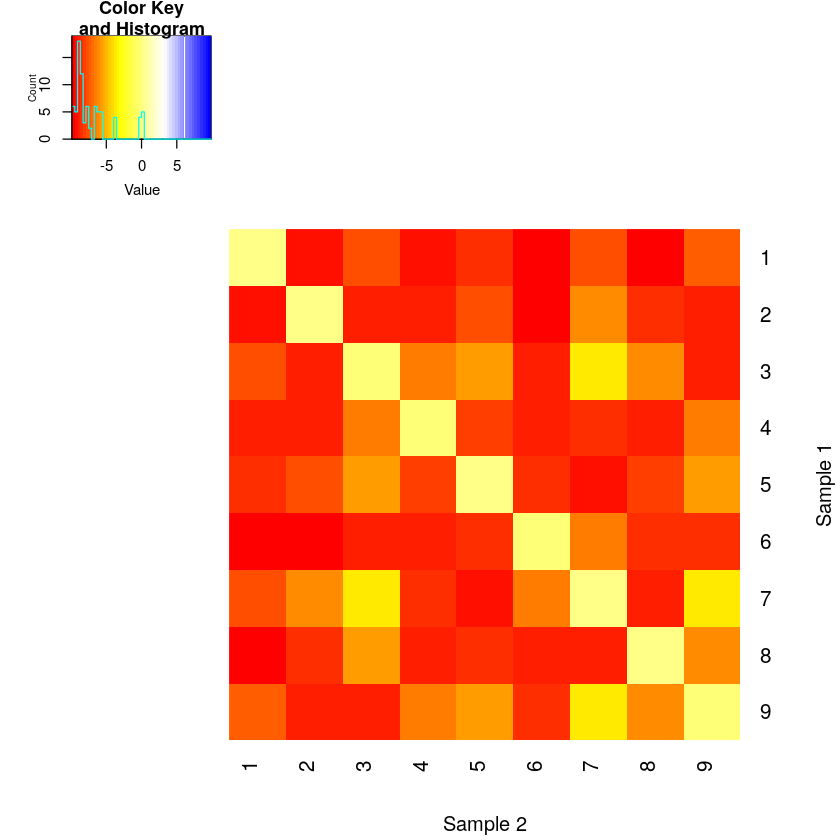

In [24]:
library(gplots)

par(mar=c(0,0,0,0))
heatmapCols <- colorRampPalette(c("red","yellow","white","blue"))(50)

heatmap.2(
    res1@ww,
    trace="none",
    col=heatmapCols,
    symm=FALSE,
    dendrogram="none",
    Rowv=FALSE,
    Colv=FALSE,
    xlab="Sample 2",
    ylab="Sample 1")

In [32]:
dat = res1@pNorm %>% c %>% as.data.frame 
colnames(dat) = "log10pvalue"
head(dat)

log10pvalue
5.399743e-01
4.170221e-21
1.205940e-14
1.939687e-19
8.761184e-18
7.100230e-22


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


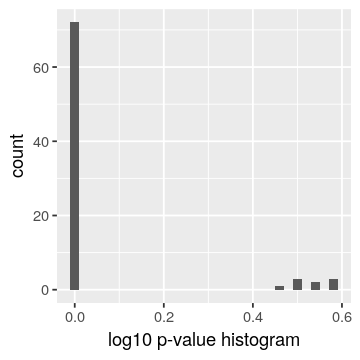

In [35]:
library(ggplot2)
options(repr.plot.height = 3, repr.plot.width = 3)
ggplot(dat, aes(x = log10pvalue)) + geom_histogram() + labs(x = "log10 p-value histogram")
#hist(res1@pNorm,xlab="log10 p-value histogram",main="")

In [48]:
head(sam1)

CD14,CD23,CD3,CD19,id
186,0,216,198,1
116,272,232,175,4
287,370,349,288,8
148,111,576,104,7
115,198,481,217,7
146,178,553,269,7


In [38]:
resMulti = makeDistmat(samples=list(sam1,sam2),sampleSize=100,ndraws=100)

computing on 24 cores
computing FR statistics between sample ... 

computing on 24 cores
computing FR statistics between sample ... 

computing on 24 cores
computing FR statistics between sample ... 



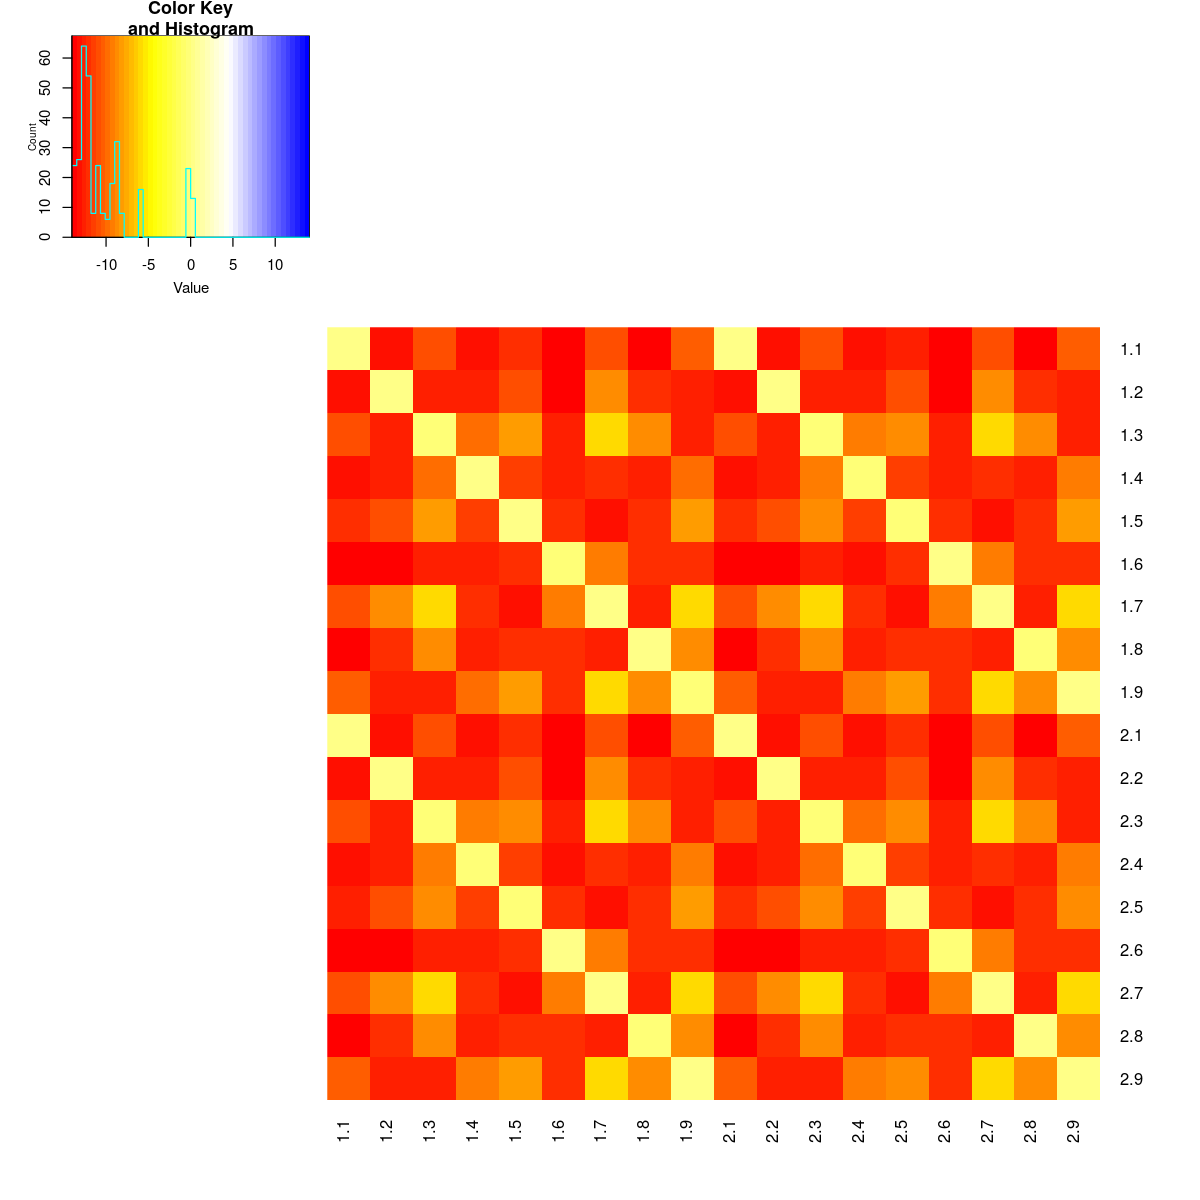

In [39]:
options(repr.plot.height = 10, repr.plot.width = 10)
require(gplots)
par(mar=c(0,0,0,0))

heatmapCols <- colorRampPalette(c("red","yellow","white","blue"))(50)
heatmap.2(resMulti$distmat,
          trace="none",
          col=heatmapCols,
          symm=FALSE,
          dendrogram="none",
          Rowv=FALSE,Colv=FALSE) 